In [3]:
### Imports and function for image extraction

###Command install

### pip install jupyter
###pip install ipywidgets tensorflow keras numpy matplotlib scikit-learn seaborn pandas jupyter pywin32
import ipywidgets as widgets
from IPython.display import display
import os
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn
import pandas as pd

### Old plugin list from exploration
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import layers, models
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# from sklearn.preprocessing import LabelEncoder
# import seaborn
# import pandas as pd
# from PIL import Image
# import json
# import os

def preprocess_image(image_path, img_size=(64, 64)):
    image = load_img(image_path, target_size=img_size)
    image = img_to_array(image)
    image = image/255.0
    return image

In [4]:
### VISUAL SAMPLE AND GENERATORS
### Choose between 3 Samples of words. These are modified photos that have not been trained on. Each photo will be displayed before the prediction will display.
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validator = datagen.flow_from_directory(
    './trainingData',
    target_size=(64, 64),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

trainer = datagen.flow_from_directory(
        './trainingData',
    target_size=(64, 64),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

model=load_model("training_model_SOURCE.keras")
options_list=['Sample1','Sample2','Sample3']

dropdown = widgets.Dropdown(
    options=options_list,
    value='Sample1',
    description='Select: ',
)

def dropdown_change(change):
    word = ''
    data = f'./{change["new"]}'
    for each in os.listdir(data):
        img = image.load_img(f"{data}/{each}", target_size=(64,64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array,axis=0)
        img_array = img_array/255.0
    
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        class_labels = list(trainer.class_indices.keys())
        predicted_letter = class_labels[predicted_class_index]
        word += predicted_letter
        plt.imshow(img)
        plt.show()
    print(f'Your phrase is: {word}')
    
display(dropdown)

dropdown.observe(dropdown_change, names='value')

Found 8400 images belonging to 35 classes.
Found 33600 images belonging to 35 classes.


Dropdown(description='Select: ', options=('Sample1', 'Sample2', 'Sample3'), value='Sample1')

In [5]:
###Upload and predict your own photo

file_upload = widgets.FileUpload(
    accept='image/jpg',
    multiple=False
)

prediction_button = widgets.Button(description ="Make Prediction!")

def on_click(b):
    word=""
    for each in os.listdir('./uploads/'):
        img = image.load_img(f"./uploads/{each}", target_size=(64,64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array,axis=0)
        img_array = img_array/255.0
        
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        class_labels = list(trainer.class_indices.keys())
        predicted_letter = class_labels[predicted_class_index]
        word += predicted_letter
        plt.imshow(img)
        plt.show()
    print(word)

def on_upload(change):
    uploaded_file = file_upload.value
    print(uploaded_file)
    filename = uploaded_file[0]['name']
    content = uploaded_file[0]['content']
    save_folder = './uploads/'

    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, filename)
    with open(save_path, 'wb') as file:
        file.write(content)
    print('Successfully uploaded')

prediction_button.on_click(on_click)
file_upload.observe(on_upload, names='value')

display(file_upload)
display(prediction_button)

FileUpload(value=(), accept='image/jpg', description='Upload')

Button(description='Make Prediction!', style=ButtonStyle())

  3/263 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step  

C:\Users\nickp\Documents\WGU Comp Sci\computer_science_capstone\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step


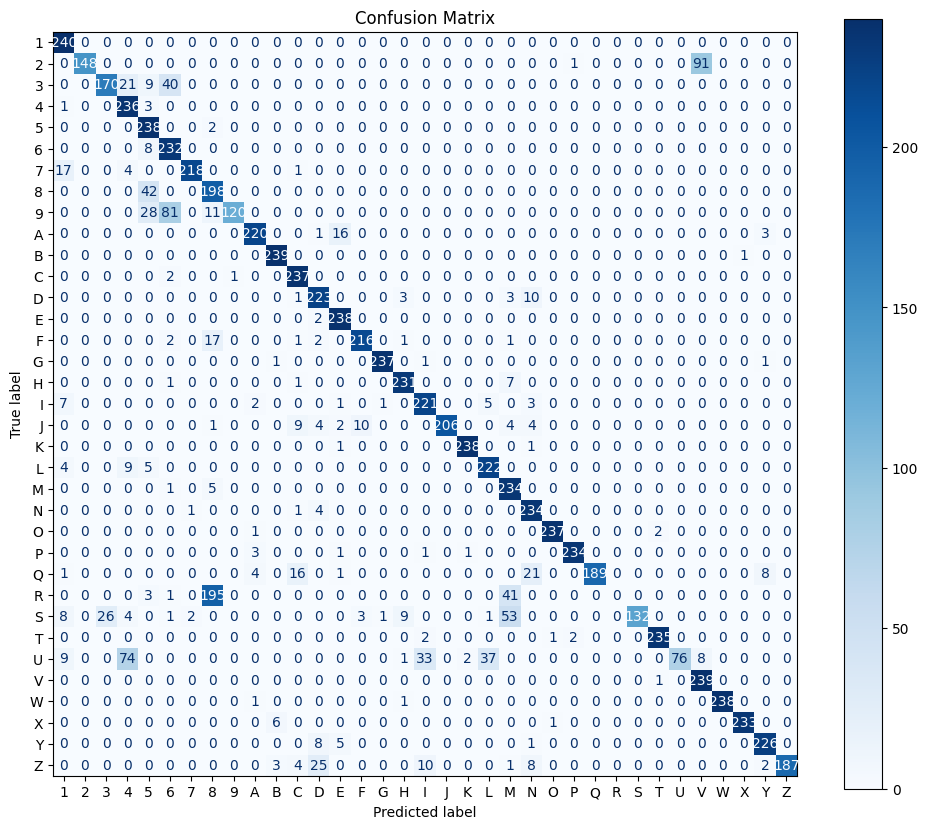

In [5]:
## CONFUSION MATRIX CODE

#Generating predictions and creating class labels for confusion Matrix
#Creating the prediction with a validation dataset for visual representation

#Loading the model
model = load_model('training_model_SOURCE.keras')

#Making a prediction using the validation dataset before creating the three visuals
#Validator generator must be ran to use it in the prediciton here.
prediction = model.predict(validator)

predicted_class_labels = np.argmax(prediction, axis = 1)
true_classes = validator.classes


#Generating the confusion matrix
matrix = confusion_matrix(true_classes, predicted_class_labels)

plt.figure(figsize=(12, 10))
matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=list(validator.class_indices.keys()))
matrix_display.plot(cmap='Blues', ax=plt.gca(), values_format='d')  # 'd' for integer formatting
plt.title('Confusion Matrix')
plt.show()


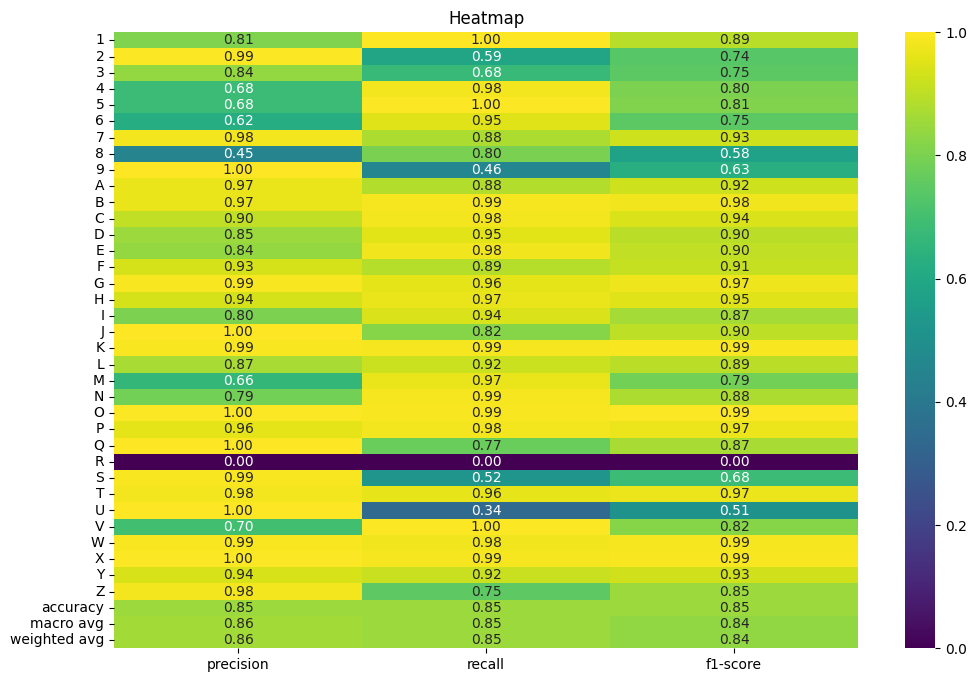

Overall Accuracy: 84.99%


In [19]:
#HEATMAP
true_label = validator.classes
prediction_classes = np.argmax(prediction, axis=1)
unique_predictions = np.unique(prediction_classes)
report = classification_report(true_label, prediction_classes, target_names=list(validator.class_indices.keys()), output_dict=True, zero_division=0)

#print(report)
report_dataframe = pd.DataFrame(report).transpose()

#Plotting the report as heatmap
plt.figure(figsize=(12,8))
seaborn.heatmap(report_dataframe[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap")
plt.show()


accuracy = np.sum(true_label == prediction_classes) / len(true_label)
print(f'Overall Accuracy: {accuracy*100:.2f}%')


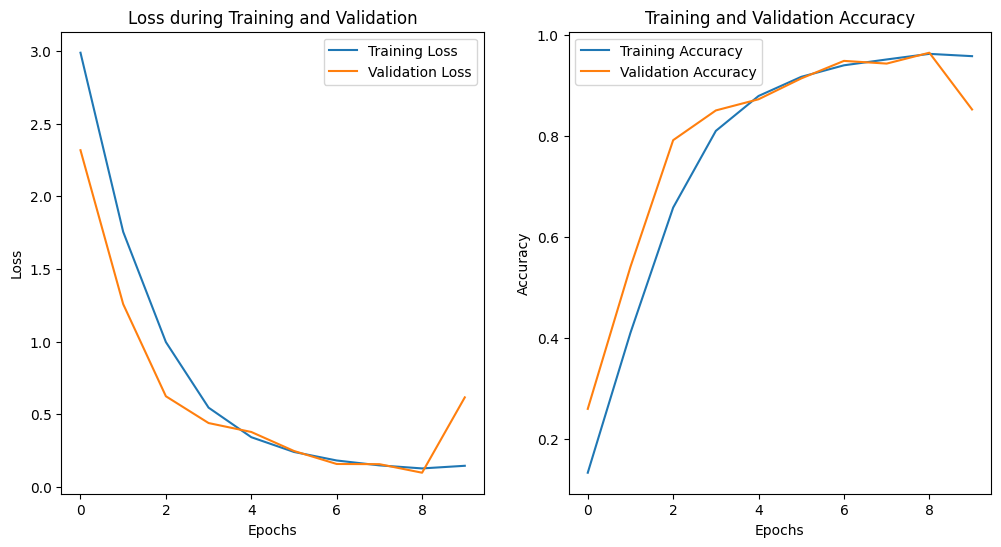

In [22]:
#Plotting accuracy changes over time during training
plt.figure(figsize=(12,6))

#Loading the training history of the model from a json file
with open('training_history.json', 'r') as file:
    history = json.load(file)
#loss
plt.subplot(1,2,1)
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label="Validation Loss")
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
          

In [4]:
#### Evaluating model with validator set and printing accuracy/loss

loss, accuracy = model.evaluate(validator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss:.2f}')


  3/263 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 1.0000 - loss: 0.0190  

C:\Users\nickp\Documents\WGU Comp Sci\computer_science_capstone\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8659 - loss: 0.4064
Validation Accuracy: 85.01%
Loss: 0.62


In [11]:
##Creating image and labels list, populating those lists and creating a numpy array out of the lists.
##Must rename kaggle folder to /trainingData: https://www.kaggle.com/datasets/harshvardhan21/sign-language-detection-using-images/data

data = './trainingData'
images = []
labels = []

for label_dir in os.listdir(data):
    if os.path.isdir(os.path.join(data, label_dir)):
        for file in os.listdir(os.path.join(data, label_dir)):
            image_path = os.path.join(data, label_dir, file)
            images.append(preprocess_image(image_path))
            labels.append(label_dir)

images = np.array(images)
labels = np.array(labels)

In [14]:
## Labeling & Saving Classes

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels_categorical = to_categorical(labels_encoded, num_classes)
np.save('classes.npy', label_encoder.classes_)

In [15]:
## Image Generator ||||| Validator & Trainer
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validator = datagen.flow_from_directory(
    './trainingData',
    target_size=(64, 64),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

trainer = datagen.flow_from_directory(
        './trainingData',
    target_size=(64, 64),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# input_shape = (64, 64, 3)
# model = model(input_shape, num_classes)
# model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# #model.summary()


Found 8400 images belonging to 35 classes.
Found 33600 images belonging to 35 classes.


In [16]:
## FUNCTION that creates model

def model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
### Running the Model |||||| Saving Model & History

input_shape = (64, 64, 3)
model = model(input_shape, num_classes)
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainer, epochs = 10, validation_data=validator)

model.save('training_model.keras')

with open('training_history.json', 'w') as file:
    json.dump(history.history, file)


In [1]:
#### Evaluating model with validator set and printing accuracy/loss

loss, accuracy = model.evaluate(validator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss:.2f}')


NameError: name 'model' is not defined